# Compress Colors KMeans

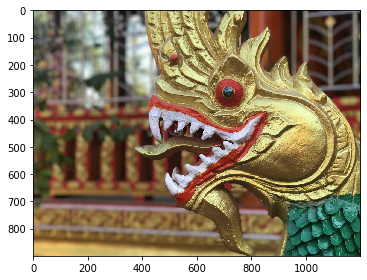

In [1]:
%matplotlib inline
from skimage import io, exposure
import numpy as np

image = io.imread("./dragon.png")[:, :, :3]
io.imshow(image)

In [2]:
image_reshaped = image.reshape(-1, 3)


In [3]:
image_reshaped[0]

array([156, 170, 160], dtype=uint8)

In [4]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 32, n_init = 1)
model.fit(image_reshaped)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=32, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [5]:
colors = model.cluster_centers_.astype("uint8")
pixels = model.labels_

np.savez_compressed("./image.npz", pixels = pixels, colors = colors)

with np.load("./image.npz") as file:
    pixels = file["pixels"]
    colors = file["colors"]

pixels_transformed = []
for pixel in pixels:
    pixels_transformed.append(colors[pixel])

In [6]:
pixels_transformed = np.array(pixels_transformed)

In [7]:
image_restored = np.array(pixels_transformed).reshape(900, 1200, 3)

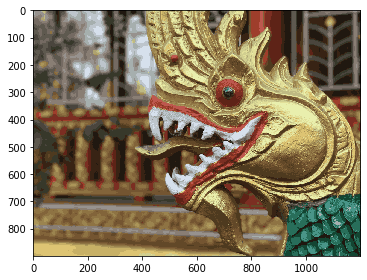

In [8]:
io.imshow(image_restored)